In [1]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r'/content/drive/MyDrive/House Price.csv')
df.head()

,Id,Address,Name_FIRST,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 82, Amsterdam",Blasiusstraat,1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",Kromme Leimuidenstraat,1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",Zaaiersweg,1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",Tenerifestraat,1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",Winterjanpad,1036 KN,720000.0,138,5,4.902503,52.410538


**EDA**

In [3]:
df.describe()

,Id,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [4]:
df.shape

(924, 9)

In [5]:
df.isnull().sum()

,0
Id,0
Address,0
Name_FIRST,2
Zip,0
Price,4
Area,0
Room,0
Lon,0
Lat,0


In [6]:
#fILLING NULL VALUES
df['Price'] = df['Price'].fillna(df['Price'].mean())


<Axes: ylabel='Frequency'>

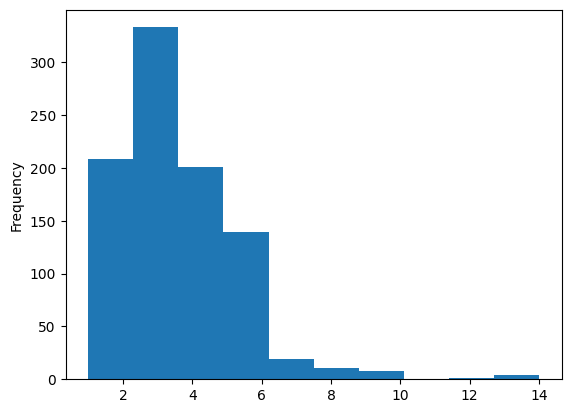

In [7]:
#CHECKING DISTRIBUTION
df['Room'].plot(kind='hist')

In [8]:

df.dtypes

,0
Id,int64
Address,object
Name_FIRST,object
Zip,object
Price,float64
Area,int64
Room,int64
Lon,float64
Lat,float64


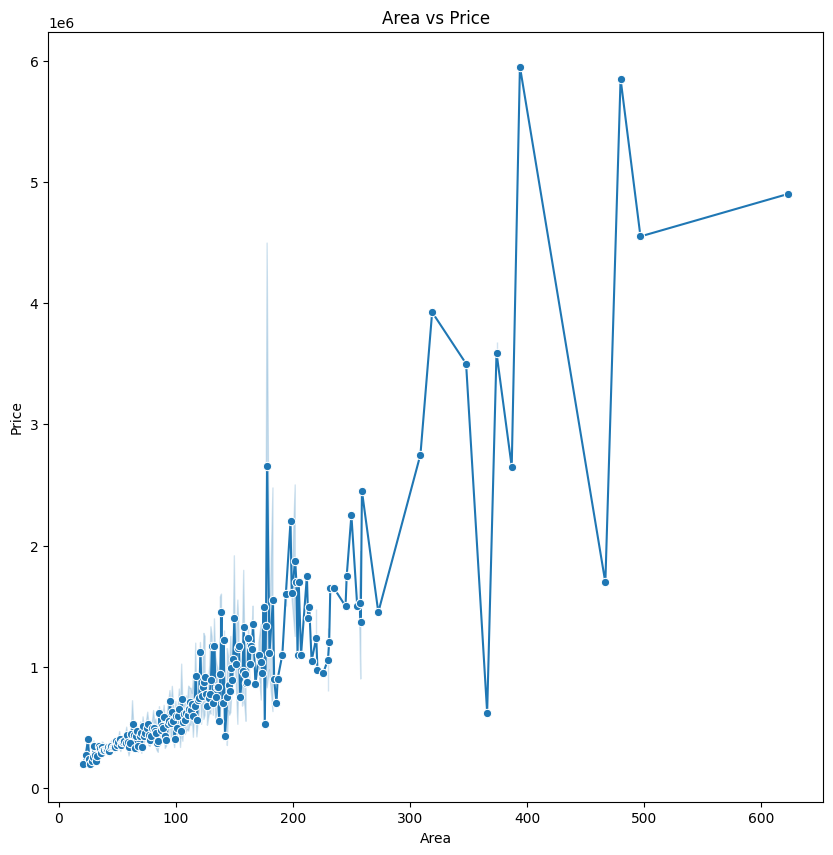

In [9]:
plt.figure(figsize=(10, 10))
line_plot = sns.lineplot(x='Area', y='Price', data=df, marker='o')

# Customize the plot
line_plot.set_title("Area vs Price")
line_plot.set_xlabel("Area")
line_plot.set_ylabel("Price")

# Display the plot
plt.show()

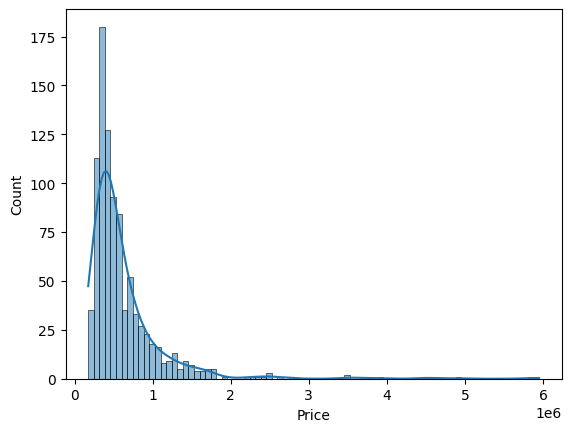

In [10]:
dist_plot = sns.histplot(df['Price'], kde=True)
plt.show()                                                                  #Right Sqewed

In [11]:
df.drop_duplicates()

,Id,Address,Name_FIRST,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 82, Amsterdam",Blasiusstraat,1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",Kromme Leimuidenstraat,1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",Zaaiersweg,1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",Tenerifestraat,1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",Winterjanpad,1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam","Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",Kleine Beerstraat,1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",Stuyvesantstraat,1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",John Blankensteinstraat,1095 MB,599000.0,113,4,4.965731,52.375268


In [12]:
# Split the address to get the first part of city name excluding the number
def split_before_number(address):
    match = re.search(r'\d', address)
    if match:
        return address[:match.start()]
    return address

# Apply the function to the DataFrame
df['Street'] = df['Address'].apply(split_before_number)

print(df)

      Id                                 Address                Name_FIRST  \
0      1             Blasiusstraat 82, Amsterdam            Blasiusstraat    
1      2  Kromme Leimuidenstraat 13 H, Amsterdam   Kromme Leimuidenstraat    
2      3              Zaaiersweg 11 A, Amsterdam               Zaaiersweg    
3      4            Tenerifestraat 40, Amsterdam           Tenerifestraat    
4      5              Winterjanpad 21, Amsterdam             Winterjanpad    
..   ...                                     ...                       ...   
919  920                     Ringdijk, Amsterdam       Ringdijk, Amsterdam   
920  921         Kleine Beerstraat 31, Amsterdam        Kleine Beerstraat    
921  922       Stuyvesantstraat 33 II, Amsterdam         Stuyvesantstraat    
922  923   John Blankensteinstraat 51, Amsterdam  John Blankensteinstraat    
923  924      S. F. van Ossstraat 334, Amsterdam      S. F. van Ossstraat    

         Zip     Price  Area  Room       Lon        Lat  \
0   

<Axes: xlabel='Street'>

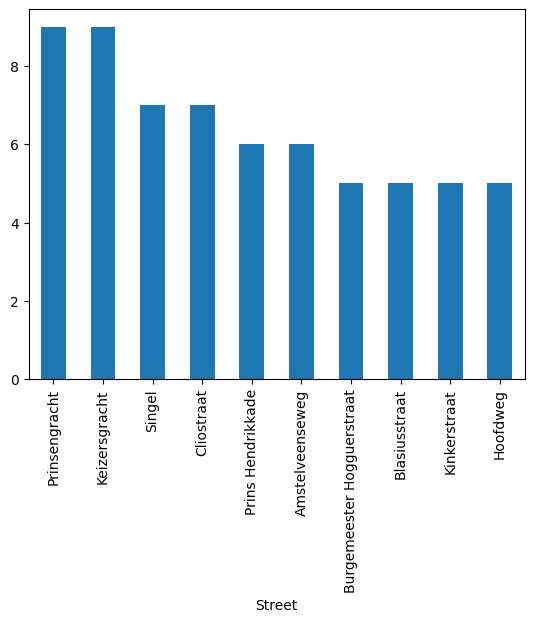

In [13]:
df['Street'] = df['Street'].str.replace('Amsterdam,? ?', '', regex=True).str.strip()
df['Street'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

**Prinsengracht,Keizersgracht,Singel,Cliostraat etc have most houses **

In [14]:
df.head()

,Id,Address,Name_FIRST,Zip,Price,Area,Room,Lon,Lat,Street
0,1,"Blasiusstraat 82, Amsterdam",Blasiusstraat,1091 CR,685000.0,64,3,4.907736,52.356157,Blasiusstraat
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",Kromme Leimuidenstraat,1059 EL,475000.0,60,3,4.850476,52.348586,Kromme Leimuidenstraat
2,3,"Zaaiersweg 11 A, Amsterdam",Zaaiersweg,1097 SM,850000.0,109,4,4.944774,52.343782,Zaaiersweg
3,4,"Tenerifestraat 40, Amsterdam",Tenerifestraat,1060 TH,580000.0,128,6,4.789928,52.343712,Tenerifestraat
4,5,"Winterjanpad 21, Amsterdam",Winterjanpad,1036 KN,720000.0,138,5,4.902503,52.410538,Winterjanpad


In [15]:
df.drop(columns=['Address','Name_FIRST'],axis=1,inplace=True)

In [16]:

#Split Zip column to Code and Abbrevation
df[['Number', 'Code']]=df['Zip'].str.split(' ',expand=True)

In [17]:
df.head()

,Id,Zip,Price,Area,Room,Lon,Lat,Street,Number,Code
0,1,1091 CR,685000.0,64,3,4.907736,52.356157,Blasiusstraat,1091,CR
1,2,1059 EL,475000.0,60,3,4.850476,52.348586,Kromme Leimuidenstraat,1059,EL
2,3,1097 SM,850000.0,109,4,4.944774,52.343782,Zaaiersweg,1097,SM
3,4,1060 TH,580000.0,128,6,4.789928,52.343712,Tenerifestraat,1060,TH
4,5,1036 KN,720000.0,138,5,4.902503,52.410538,Winterjanpad,1036,KN


<Axes: xlabel='Number'>

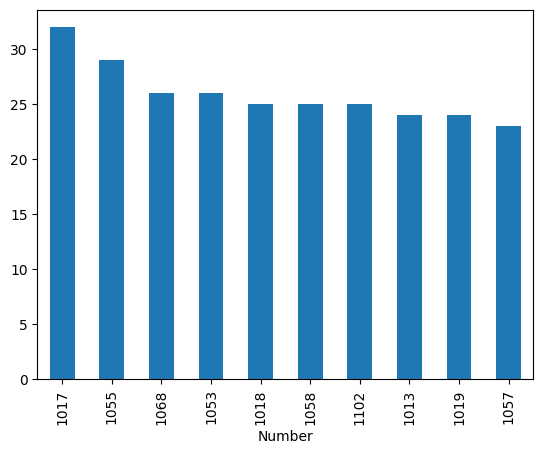

In [18]:
df['Number'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

#1017,1055,1068,1053,1018,1058,1102 and few other areas are having high frequency of homes


In [19]:
#Cities with high prices -Prices greater than mean
high_price_threshold = df['Price'].mean()

# Filter streets where prices are high
high_price_streets = df[df['Price'] > high_price_threshold]

# Optional: Group by Street and get average or max price for more insights
high_price_streets_grouped = high_price_streets.groupby('Street').agg({'Price': ['mean', 'max']}).reset_index()

print("Streets with high prices:")
high_price_streets[['Price','Area','Room','Street']]

Streets with high prices:


,Price,Area,Room,Street
0,685000.0,64,3,Blasiusstraat
2,850000.0,109,4,Zaaiersweg
4,720000.0,138,5,Winterjanpad
14,650000.0,86,3,Blasiusstraat
16,700000.0,102,6,Paramaribostraat
...,...,...,...,...
910,1698000.0,205,5,Valeriusstraat
913,675000.0,129,4,Bastenakenstraat
914,849000.0,111,5,Hagedoornplein
917,1500000.0,194,9,Kromme Waal


<ipython-input-20-7bc862b79abd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Street', y='Price', data=high_price_streets_sorted, palette='viridis')


<Axes: xlabel='Street', ylabel='Price'>

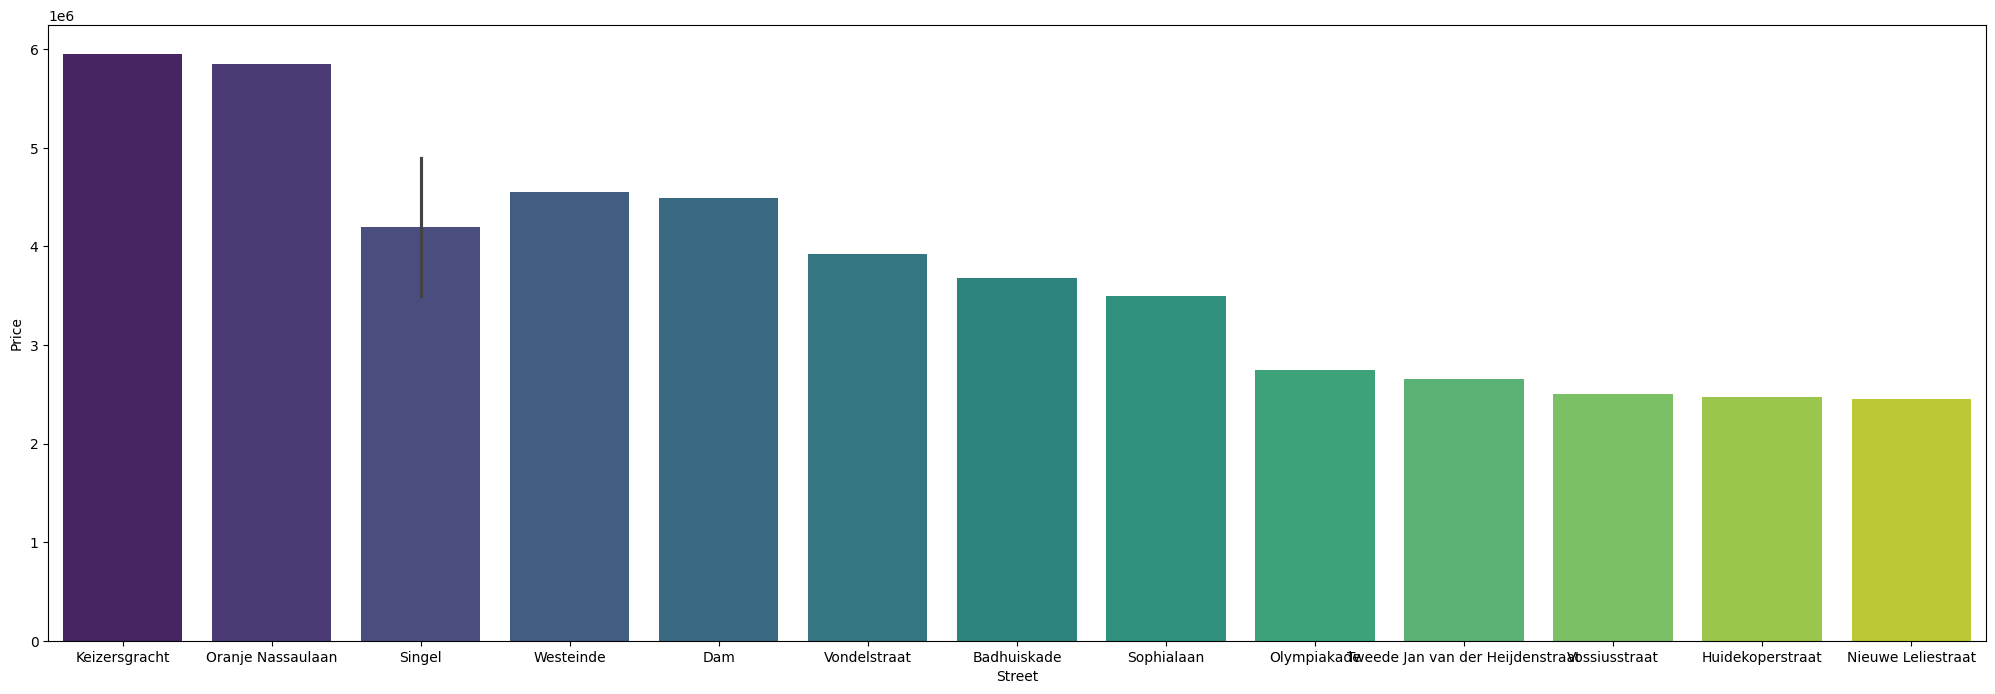

In [20]:
  #Cities with prices higher than average price
high_price_streets_sorted = high_price_streets.sort_values(by='Price', ascending=False).head(15)
plt.figure(figsize=(25,8))
sns.barplot(x='Street', y='Price', data=high_price_streets_sorted, palette='viridis')

<ipython-input-21-5b36d0e556e6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Room', y='Average Price', data=best_value_rooms, palette='viridis')


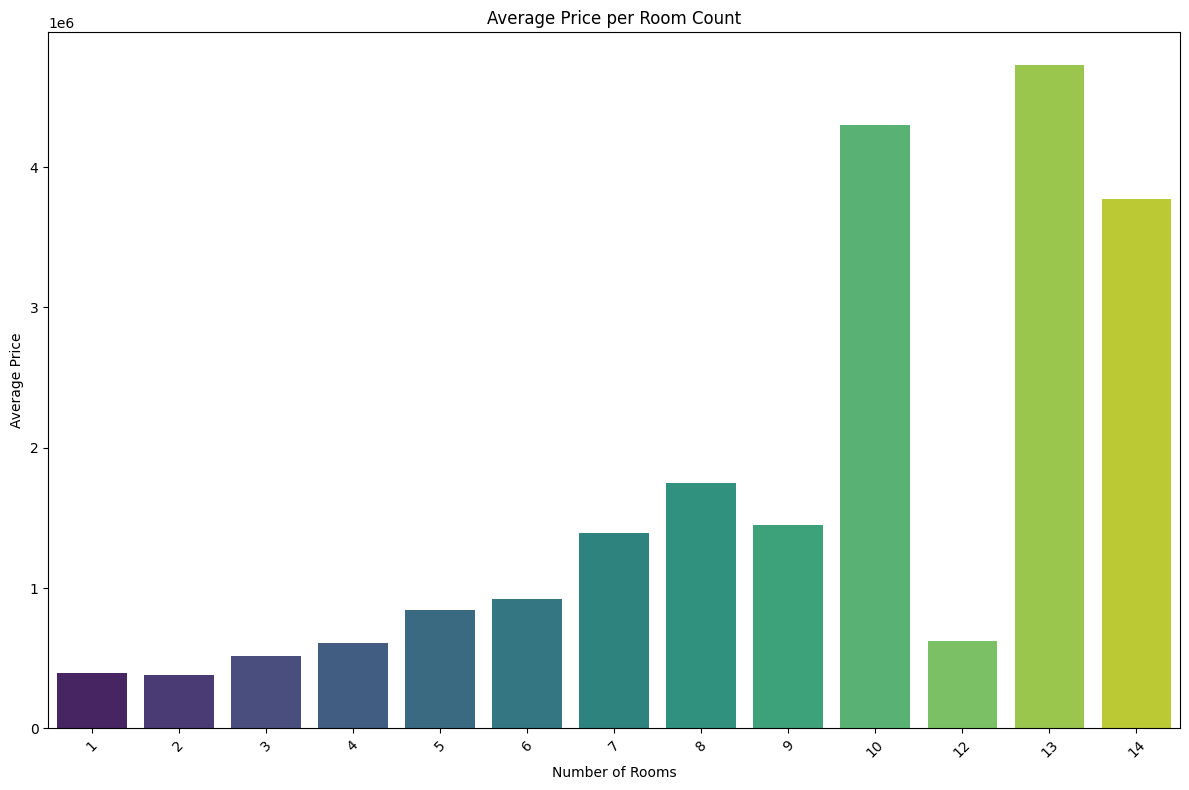

Rooms that offer the best value for money (sorted by average price):


In [21]:
avg_price_per_room = df.groupby('Room')['Price'].mean().reset_index()
avg_price_per_room.columns = ['Room', 'Average Price']

# Determine the best value for money rooms
best_value_rooms = avg_price_per_room.sort_values(by='Average Price')

# Plotting the comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Room', y='Average Price', data=best_value_rooms, palette='viridis')
plt.title('Average Price per Room Count')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Rooms that offer the best value for money (sorted by average price):")
#best_value_rooms

In [22]:
df['Number'].value_counts()

,count
Number,
1017,32
1055,29
1068,26
1053,26
1018,25
1058,25
1102,25
1013,24
1019,24


In [23]:
#Encodinng of categorical features USING FREQUENCY DISTRIBUTION
city_freq_encoding = df['Number'].value_counts().to_dict()
df['Number_encoded'] = df['Number'].map(city_freq_encoding)
df.drop(columns=['Number'],axis=1,inplace=True)

In [24]:
with open('city_freq_encoding.json', 'w') as f:
    json.dump(city_freq_encoding, f)


In [25]:
df.head()

,Id,Zip,Price,Area,Room,Lon,Lat,Street,Code,Number_encoded
0,1,1091 CR,685000.0,64,3,4.907736,52.356157,Blasiusstraat,CR,15
1,2,1059 EL,475000.0,60,3,4.850476,52.348586,Kromme Leimuidenstraat,EL,9
2,3,1097 SM,850000.0,109,4,4.944774,52.343782,Zaaiersweg,SM,8
3,4,1060 TH,580000.0,128,6,4.789928,52.343712,Tenerifestraat,TH,17
4,5,1036 KN,720000.0,138,5,4.902503,52.410538,Winterjanpad,KN,5


In [26]:
city_freq_encoding = df['Street'].value_counts().to_dict()
df['Street_encoded'] = df['Street'].map(city_freq_encoding)
df.drop('Street',axis=1,inplace=True)

In [27]:
city_freq_encoding = df['Code'].value_counts().to_dict()
df['Code_encoded'] = df['Code'].map(city_freq_encoding)
df.drop('Code',axis=1,inplace=True)

In [28]:
df.drop(columns=['Id','Zip'],axis=1,inplace=True)

In [29]:
df.head()


,Price,Area,Room,Lon,Lat,Number_encoded,Street_encoded,Code_encoded
0,685000.0,64,3,4.907736,52.356157,15,5,7
1,475000.0,60,3,4.850476,52.348586,9,1,4
2,850000.0,109,4,4.944774,52.343782,8,1,6
3,580000.0,128,6,4.789928,52.343712,17,2,4
4,720000.0,138,5,4.902503,52.410538,5,1,5


<Axes: >

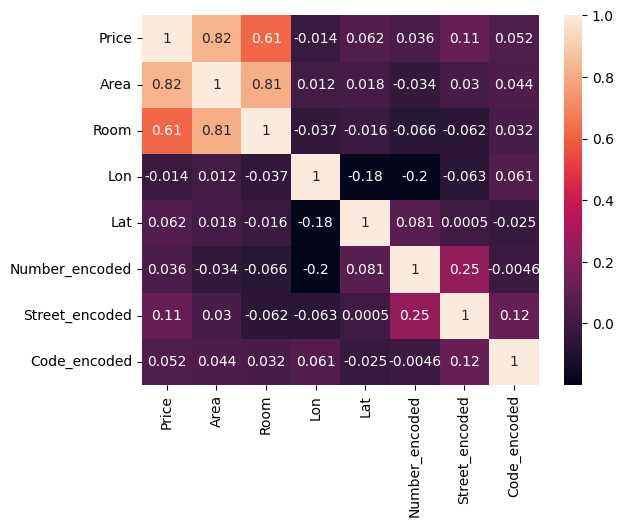

In [30]:
sns.heatmap(df.corr(),annot=True)

In [31]:
#Split data to train and test
X = df.drop(columns=['Price', 'Lat'])
y=df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
#SCALING train and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)


In [34]:
model = RandomForestRegressor(n_estimators=140, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Absolute Error: 155518.3290763714
Mean Squared Error: 129166204499.36592
R-squared: 0.7429883631597539


In [35]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150,],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [36]:
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

Best Hyperparameters:
{'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}


In [37]:
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

# Calculate the Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Model Evaluation:
Mean Squared Error: 144367344748.6231
R-squared: 0.7127415199359994


In [38]:
#Trying different models
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score




# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR(kernel='linear'),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=150, random_state=42),
    'XGBoost': XGBRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

# Train models and collect R² values
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results.append({
        'Model': name,
        'Train R²': train_r2,
        'Test R²': test_r2
    })

# Create DataFrame with results
results_df = pd.DataFrame(results)

# Display results
results_df


,Model,Train R²,Test R²
0,Linear Regression,0.637351,0.795836
1,Random Forest,0.950913,0.706158
2,SVM,-0.077728,-0.091281
3,Gradient Boosting,0.964620,0.594112
4,XGBoost,0.999608,0.675605
5,AdaBoost,0.795465,0.542858


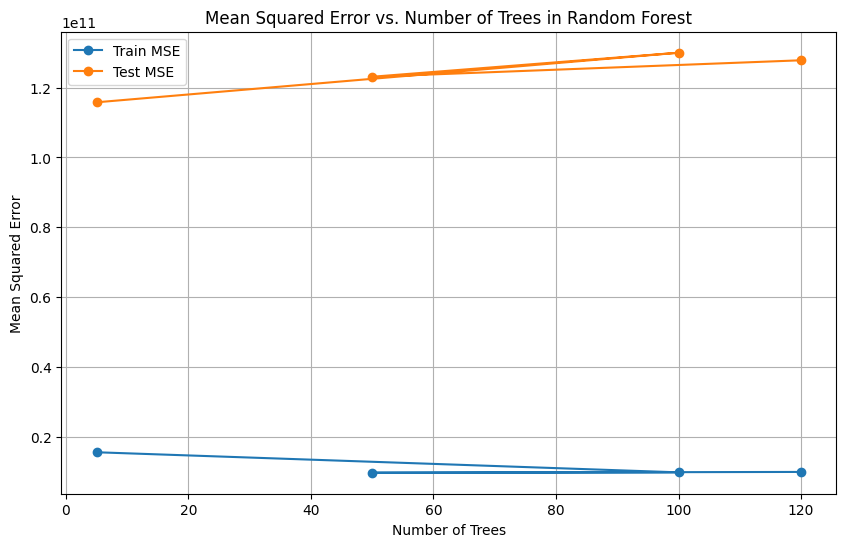

In [39]:
#Hyperparameter tuning
n_estimators_values=[5,100,50,120]
r2_values = []
train_mse_values = []
test_mse_values = []
for n_estimators in n_estimators_values:
    # Create a Random Forest Regressor with the current number of trees
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions on the training set
    y_train_pred = rf_model.predict(X_train)

    # Calculate the training MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mse_values.append(train_mse)

    # Make predictions on the test set
    y_test_pred = rf_model.predict(X_test)

    # Calculate the test MSE
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mse_values.append(test_mse)

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_mse_values, marker='o', label='Train MSE')
plt.plot(n_estimators_values, test_mse_values, marker='o', label='Test MSE')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Number of Trees in Random Forest')
plt.legend()
plt.grid(True)
plt.show()